-43.0
56.0
12.0
39.0
60.0
36.0
26.0
28.0
34.0
55.0
42.0
33.0
41.0
31.0
60.0
38.0
52.0
57.0
41.0
22.0
-36.0
44.0
52.0
31.0
22.0
39.0
14.0
23.0
50.0
56.0
-63.0
21.0
30.0
54.0
42.0
38.0
-18.0
33.0
-38.0
51.0
-64.0
28.0
-56.0
51.0
44.0
29.0
-22.0
54.0
15.0
48.0
41.0
53.0
1.0
19.0
-35.0
50.0
-4.0
57.0
30.0
24.0
-3.0
60.0
-57.0
50.0
9.0
20.0
60.0
60.0
60.0
54.0
27.0
30.0
-45.0
21.0
38.0
19.0
-13.0
50.0
-11.0
60.0
45.0
28.0
60.0
25.0
60.0
22.0
29.0
51.0
51.0
34.0
-19.0
45.0
36.0
24.0
-12.0
55.0
60.0
34.0
-40.0
54.0
-63.0
34.0
35.0
19.0
16.0
53.0
49.0
53.0
60.0
22.0
31.0
60.0
17.0
40.0
2.0
19.0
-9.0
60.0
-57.0
42.0
-58.0
21.0
8.0
41.0
-34.0
36.0
47.0
57.0
-19.0
22.0
60.0
46.0
27.0
60.0
60.0
38.0
49.0
29.0
43.0
60.0
25.0
30.0
15.0
52.0
49.0
51.0
-53.0
19.0
51.0
38.0
-45.0
60.0
14.0
47.0
-59.0
26.0
43.0
43.0
4.0
21.0
16.0
32.0
17.0
59.0
57.0
38.0
34.0
31.0
-25.0
37.0
-51.0
36.0
60.0
33.0
33.0
23.0
-66.0
30.0
43.0
26.0
8.0
28.0
-55.0
35.0
-23.0
48.0
-20.0
44.0
-59.0
42.0
46.0
52.0
25.0
51.0
8.0
3

<ipython-input-4-6a973f8b78fb>:79: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,0), 1) # 正解はgreen


True

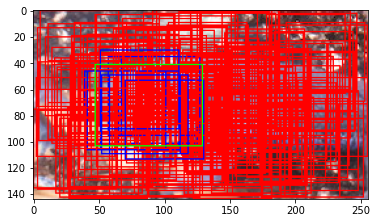

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# get IoU overlap ratio
def iou(a,b):
    # get area of a
    area_a = (a[2]-a[0])*(a[3]- a[1])  # これは座標？
    # get_area of b
    area_b = (b[2] - b[0])*(b[3] - b[1])
    
    # get left top of IoU
    iou_x1 = np.maximum(a[0], b[0])  # x座標が大きい方
    iou_y1 = np.maximum(a[1], b[1])  # y座標が大きい方
    iou_x2 = np.minimum(a[2], b[2])  # x座標が小さい方
    iou_y2 = np.minimum(a[3], b[3])  # y座標が小さい方
    
    # get width of iou
    iou_w = iou_x2 - iou_x1
    iou_h = iou_y2 - iou_y1
    print(iou_w)
    print(iou_h)
    
    # no overlap
    # 重なっている部分がないとき
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of iou
    area_iou = iou_w*iou_h
    # get overlap ratio between iou and all area
    # ベン図書いてみるとわかりやすい
    iou = area_iou / (area_a + area_b - area_iou)
    
    return iou

# crop and create detabase
def crop_bbox(img, gt, Crop_N=200, L=60, th=0.5):
    # get shape
    H,W,C = img.shape
    
    # each crop
    for i in range(Crop_N):
        # get left top x of crop bounding box
        x1 = np.random.randint(W-L)
        # get left top y of crop bounding box
        y1 = np.random.randint(H-L)
        x2 = x1+L
        y2 = y1+L
        
        # crop bounding box
        crop = np.array((x1,y1,x2,y2))
        
        # get iou between crop box and gt
        _iou = iou(gt, crop)
        
        # assing lable
        # img上にサンプリングした四角形を描く
        if _iou>=th:
            cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 1) # 1 thickness of 1 px
            label  = 1
        else:
            cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 1)
            label = 0
            
    return img 

img = cv2.imread('../imori_1.jpg')

# get bounding box
gt = np.array((47,41,129,103), dtype=np.float32)
# get crop bounding box
img = crop_bbox(img, gt)

# draw gt
cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,0), 1) # 正解はgreen

plt.imshow(img)
cv2.imwrite('out94.jpg', img)